In [2]:
# %matplotlib widget
import ipywidgets as widgets
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

Do wygenerowania rozkładów z zadania 1 z listy drugiej, wystarczy wziąć jakiś pythonowy generator liczby z rozkładów stabilnych, nie trzeba się szczypać z definicją ;)

In [3]:
"""
Do wygenerowania zmiennych stabilnych korzystamy z funkcji levy_stable. 
To zgadza się z definicją 1.2 z Chaptera Nolana.:) 
"""

'\nDo wygenerowania zmiennych stabilnych korzystamy z funkcji levy_stable. \nTo zgadza się z definicją 1.2 z Chaptera Nolana.:) \n'

In [4]:
from scipy.stats import levy_stable, gaussian_kde

In [33]:
def X(alpha, beta, gamma=0, delta=1, N=1):
    """
    alpha must be from 0 < alpha < 2;
    beta must be from -1 <= beta <= 1.
    """
    if (0 < alpha <= 2) and (-1 <= beta <= 1):
        return levy_stable.rvs(alpha, beta, loc=gamma, scale=delta, size=N)
    else:
        print("ValueError: alpha or beta are not in correct numeric interval. Please check entered arguments and 'documentations'.")

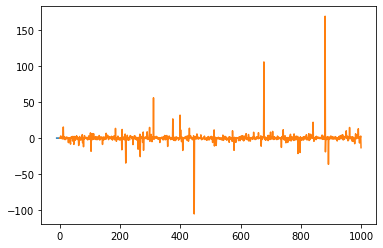

In [42]:
x = np.linspace(-10,10,1000)
R = X(1.25, 0, N=1000)
kde = gaussian_kde(R)
y = kde(x)
plt.plot(x, y)
plt.plot(R)

In [43]:
def alpha_stable(a, b, g, d, k, N):
    
    Z = X(a, b, d, g, N)
    
    if k == 0:
        
        if a == 1:
            
            return g*Z + d
        
        elif a != 1:
            
            return g*(Z - b*np.tan(np.pi*a/2)) + d
    
    elif k == 1:
        
        if a != 1:
            
            return g*Z + d
        
        elif a == 1:
            return g*Z + d + b*(2/np.pi)*g*np.log(g)

In [44]:
norm = alpha_stable(2, 0, 1, 0, 0, 1000)

In [45]:
norm2 = alpha_stable(2, 0, 1, 0, 1, 1000)

(array([  8.,  38., 120., 207., 233., 220., 116.,  46.,  10.,   2.]),
 array([-4.21908801, -3.30354852, -2.38800903, -1.47246954, -0.55693005,
         0.35860944,  1.27414893,  2.18968842,  3.10522792,  4.02076741,
         4.9363069 ]),
 <BarContainer object of 10 artists>)

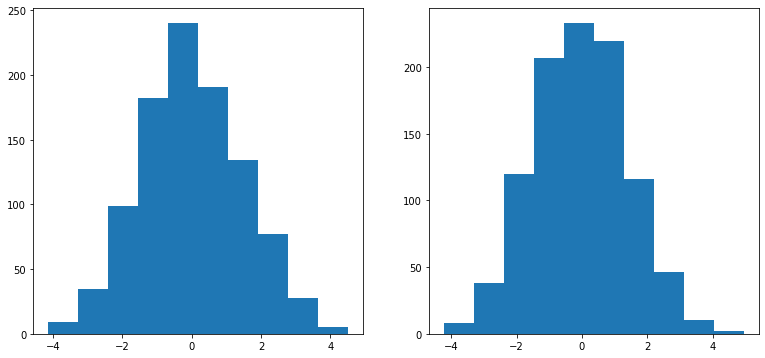

In [46]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.hist(norm)
plt.subplot(1, 2, 2)
plt.hist(norm2)

In [47]:
x = np.linspace(-6, 6, 10000)

norm_pdf = np.exp(-x**2/2)/np.sqrt(2*np.pi)

kde = gaussian_kde(norm)
y = kde(x)

kde_2 = gaussian_kde(norm2)
y2 = kde_2(x)

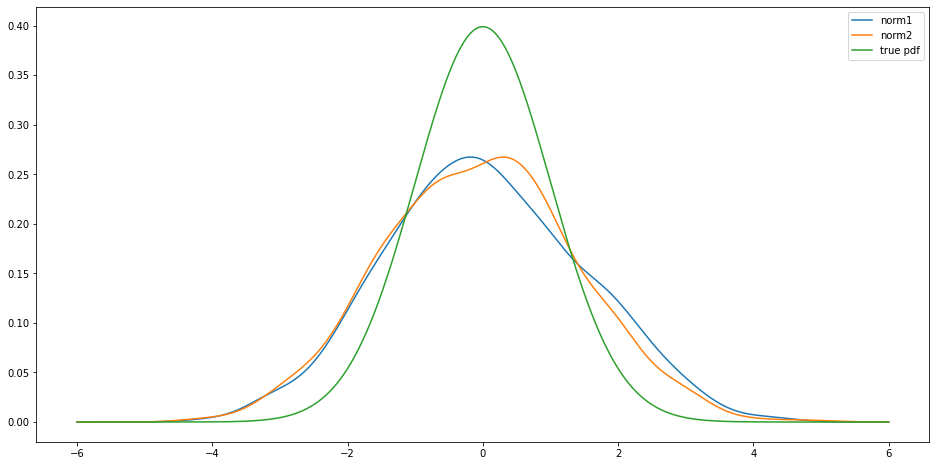

In [48]:
plt.figure(figsize=(16, 8))
plt.plot(x, y, label='norm1')
plt.plot(x, y2,  label='norm2')
plt.plot(x, norm_pdf,  label='true pdf')
plt.legend()

# coś widocznie nie gra w moim kodzie, bo powinno ładnie rysować ten rozkład normalny. :/
